# Differentiation

Consider $y=f(x) = (x-2)^2$. Let's find out the minimum value of the function. 

In [5]:
x = 0.5
delta = 1e-5
slope_at_x = ( (x + delta)**2 - x**2 ) / delta
print(slope_at_x)

1.0000099999962764


## Method 1) Mathematical Differentiation

$f^{\prime}(x) = 2(x-2)$. Thus, $f(x)$ is minimzed at $x=2$ satisfying $f^{\prime}(x)=0$.

## Method 2) Numerical Gradient Descent

What if we can't obtain $f^{\prime}(x)$?

In [8]:
x = 1
delta = 10
slope_at_x = ( (x + delta - 2 )**2 - (x -2)**2 ) / delta
print(slope_at_x)

8.0


In [21]:
x_start=-10
delta = 1e-4
x_move=1e-3

for i in range(20000):
    slope_at_x = ( (x_start+delta-2)**2 - (x_start - 2)**2 ) / delta 
    print(f"{slope_at_x}, {x_start}")
    if slope_at_x>=0:
        print(f"결과: slope_at_x={( (x_start-x_move+delta-2)**2 - (x_start-x_move - 2)**2 ) / delta } x={x_start-x_move}")
        break
    else:
        x_start+=x_move



-23.999899999864738, -10
-23.997899999983474, -9.999
-23.995899999817993, -9.998000000000001
-23.99389999993673, -9.997000000000002
-23.99189999977125, -9.996000000000002
-23.989899999889985, -9.995000000000003
-23.98790000000872, -9.994000000000003
-23.985900000127458, -9.993000000000004
-23.983899999961977, -9.992000000000004
-23.981900000080714, -9.991000000000005
-23.979899999915233, -9.990000000000006
-23.977899999749752, -9.989000000000006
-23.97589999986849, -9.988000000000007
-23.973899999987225, -9.987000000000007
-23.971899999821744, -9.986000000000008
-23.96989999994048, -9.985000000000008
-23.967900000059217, -9.984000000000009
-23.965899999893736, -9.98300000000001
-23.963900000012472, -9.98200000000001
-23.96190000013121, -9.98100000000001
-23.959899999965728, -9.980000000000011
-23.957900000084464, -9.979000000000012
-23.955899999918984, -9.978000000000012
-23.953899999753503, -9.977000000000013
-23.95189999987224, -9.976000000000013
-23.949899999990976, -9.9750000000000

In [ ]:
x_start= -10
delta=1e-4
x_move=1e-3

def fx(x):
    return (x-2)**2

def slope_at_x(x):
    return (fx(x+delta)-fx(x))/delta

x=x_start
for i in range(10000):
    slope=slope_at_x(x)

    if slope<0:
        x+=x_move
    elif slope>0:
        x-=x_move
    else:
        print(x)
        break

x=1.3999799999998555, f(x)=0.36002400040017346
x=1.6399679999998797, f(x)=0.1296230410240866
x=1.7839607999999276, f(x)=0.046672935936671274
x=1.870356479999959, f(x)=0.016807442278001024
x=1.922193887999967, f(x)=0.0060537910645616895
x=1.9532963327999762, f(x)=0.002181232529930582
x=1.9719577996799835, f(x)=0.000786364998787932
x=1.9831546798079887, f(x)=0.00028376481237138527
x=1.9898728078847925, f(x)=0.0001025600201383213
x=1.993903684730875, f(x)=3.71650598605655e-05
x=1.9963222108385248, f(x)=1.3526133116264521e-05
x=1.9977733265031148, f(x)=4.9580748617310184e-06
x=1.9986439959018687, f(x)=1.8387471141488873e-06
x=1.9991663975411211, f(x)=6.948930594488951e-07
x=1.9994798385246726, f(x)=2.705679604147852e-07
x=1.9996679031148035, f(x)=1.1028834115723798e-07
x=1.999780741868882, f(x)=4.80741280613604e-08
x=1.9998484451213292, f(x)=2.2968881248921206e-08
x=1.9998890670727976, f(x)=1.2306114337700515e-08
x=1.9999134402436785, f(x)=7.492591414445596e-09


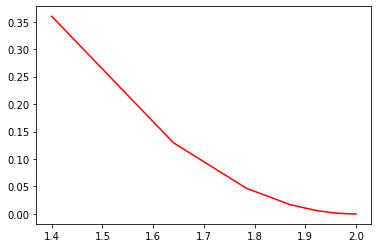

In [2]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
#x = Variable(torch.tensor(0.0), requires_grad=True)
x_list=[]
fx_list= []
x = 1
delta = 0.0001
lr = 0.2
for i in range(20):
    slope_at_x = ( (x+delta-2)**2 - (x - 2)**2 ) / delta 
    x = x - lr * slope_at_x
    print(f'x={x}, f(x)={(x-2)**2}')
    x_list.append(x)
    fx_list.append((x - 2)**2)

plt.plot(x_list, fx_list, 'r-', label='Gradient Descent')
plt.show()

## Method 3) Pytorch's AutoGrad


In [1]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt
x = torch.randn((1,1), dtype=torch.float32,requires_grad=True)
lr = 0.01
for i in range(2000):
    y = (x - 2)**2
    y.backward() #기울기를 계산
    f_prime_x = 2*(x-2)
    print(f'x={x.item()}, x.grad={x.grad.item()}, f_prime_x={f_prime_x.item()}, y={y.item()}')#.item(): 값만 읽어오게함(없어도됨), x.
    x = x.item() - lr*x.grad
    x.requires_grad = True


c:\Users\user\AppData\Local\Programs\Python\Python38\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


x=-1.665556788444519, x.grad=-7.331113815307617, f_prime_x=-7.331113815307617, y=13.436307907104492
x=-1.5922456979751587, x.grad=-7.184491157531738, f_prime_x=-7.184491157531738, y=12.904228210449219
x=-1.5204007625579834, x.grad=-7.040801525115967, f_prime_x=-7.040801525115967, y=12.393221855163574
x=-1.4499927759170532, x.grad=-6.899985313415527, f_prime_x=-6.899985313415527, y=11.902449607849121
x=-1.3809928894042969, x.grad=-6.761985778808594, f_prime_x=-6.761985778808594, y=11.431113243103027
x=-1.31337308883667, x.grad=-6.62674617767334, f_prime_x=-6.62674617767334, y=10.97844123840332
x=-1.247105598449707, x.grad=-6.494211196899414, f_prime_x=-6.494211196899414, y=10.543694496154785
x=-1.1821634769439697, x.grad=-6.3643269538879395, f_prime_x=-6.3643269538879395, y=10.126164436340332
x=-1.1185202598571777, x.grad=-6.2370405197143555, f_prime_x=-6.2370405197143555, y=9.725168228149414
x=-1.0561498403549194, x.grad=-6.112299919128418, f_prime_x=-6.112299919128418, y=9.34005260467

In [13]:
import torch

x=torch.tensor([3.0], dtype=torch.float32, requires_grad=True)
lr=0.01

for i in range(1000):
    y=(x-1)**2
    y.backward()

    x = x.item() - lr*x.grad
    x.requires_grad = True
print(x)

tensor([1.0000], requires_grad=True)


# Multi-Variables

Consider $z=f(x,y) = (x-2)^2 + (y-1)^4$. Let's find out the minimum value of the function. 
# How to get gradients

$\frac{\partial}{\partial x}((x-2)^{2} + (y-1)^{3}) = 2(x-2)$

$\frac{\partial}{\partial y}((x-2)^{2} + (y-1)^{3}) = 4(y-1)^3$

In [2]:
import torch
x = 1.0
y = 0.0

# Numerical
delta = 0.00001
f_prime_x = ( (x+delta-2)**2 + (y-1)**4 - (x-2)**2 - (y-1)**4 ) / delta
f_prime_y = ( (x-2)**2 + (y+delta-1)**4 - (x-2)**2 - (y-1)**4 ) / delta
print(2*(x-2), 4*(y-1))
print(f_prime_x, f_prime_y)

#Pytorch autograd using backward propagation
x = torch.tensor(x, requires_grad=True)
y = torch.tensor(y, requires_grad=True)
z = (x-2)**2 + (y-1)**4
z.backward()
print(x.grad.item(), y.grad.item())


-2.0 -4.0
-1.9999900000122748 -3.9999400003765113
-2.0 -4.0


## Minimize f(x,y)


In [3]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

# 초기값으로 x와 y를 무작위로 초기화합니다.
x = torch.randn((1, 1), dtype=torch.float32, requires_grad=True)
y = torch.randn((1, 1), dtype=torch.float32, requires_grad=True)

# 학습률을 설정합니다.
lr = 0.1

# 2000번의 반복을 수행합니다.
for i in range(2000):
    # 손실 함수 z를 계산합니다.
    z = (x - 2) ** 2 + (y - 1) ** 4

    # 현재의 x, y, 그리고 z 값을 출력합니다.
    print(x.item(), y.item(), z.item())

    # 손실 함수 z를 x와 y에 대해 미분하여 그래디언트를 계산합니다.
    z.backward()

    # 경사하강법을 사용하여 x와 y를 업데이트합니다.
    x = x.item() - lr * x.grad
    y = y.item() - lr * y.grad

    # x와 y 변수가 그래디언트를 추적하도록 설정합니다.
    x.requires_grad = True
    y.requires_grad = True


0.5679868459701538 -0.006435407791286707 3.0766525268554688
0.854389488697052 0.4013368785381317 1.440872311592102
1.0835115909576416 0.4871606230735779 0.9091222286224365
1.2668092250823975 0.5411121845245361 0.5819118022918701
1.413447380065918 0.5797648429870605 0.37523066997528076
1.5307579040527344 0.6094498634338379 0.24345335364341736
1.6246063709259033 0.6332780122756958 0.15900659561157227
1.6996850967407227 0.6530054807662964 0.10468645393848419
1.759748101234436 0.6697174310684204 0.06962085515260696
1.8077985048294067 0.6841291785240173 0.04689634218811989
1.8462388515472412 0.6967355012893677 0.0321008563041687
1.8769910335540771 0.7078919410705566 0.022411923855543137
1.9015928506851196 0.7178618311882019 0.016020435839891434
1.9212743043899536 0.7268453240394592 0.011764906346797943
1.9370194673538208 0.7349977493286133 0.008898265659809113
1.9496155977249146 0.7424417734146118 0.006939084734767675
1.9596924781799316 0.7492759227752686 0.0055763982236385345
1.96775400638

이 코드는 PyTorch를 사용하여 변수 x와 y에 대한 함수 z를 최소화하는 과정을 보여줍니다. 이 과정은 경사하강법을 사용하여 수행됩니다. 코드의 각 부분에 대한 설명은 다음과 같습니다:

- `x`와 `y`는 초기값이 지정된 스칼라 변수로 정의됩니다.
- `lr`은 학습률(learning rate)로, 경사하강법 단계 크기를 제어합니다.
- 반복문은 2000번 실행됩니다. 각 반복에서 다음 단계가 수행됩니다:
  1. `z`는 주어진 함수 $(x - 2)^2 + (y-1)^4$ 의 값을 계산합니다.
  2. `z.backward()`를 호출하여 변수 `x`와 `y`에 대한 그래디언트(기울기)를 계산합니다.
  3. `x`와 `y`의 값을 경사하강법을 사용하여 업데이트합니다.
  4. `x.requires_grad`와 `y.requires_grad`를 True로 설정하여 PyTorch에게 `x`와 `y`가 업데이트된 값을 추적하도록 알립니다.

이 과정은 `z`를 최소화하기 위해 `x`와 `y`를 조정합니다. 경사하강법을 사용하여 손실 함수를 최소화하는 것은 기계 학습 및 신경망 훈련과 같은 다양한 최적화 문제에서 일반적으로 사용되는 기술입니다.

출력에서는 각 반복에서 `x`, `y`, 및 `z`의 값을 볼 수 있습니다. `x`와 `y`가 업데이트됨에 따라 손실 함수 `z`가 최소값으로 수렴하도록 변하는 것을 확인할 수 있을 것입니다.

## <span style="color:yellow"> Lab: </span> Minimize $f(x,y,z) = (x-2)^2 + (y-1)^2 + 2(z-4)^2$.

In [17]:
import numpy as np
import torch
from torch.autograd import Variable
import matplotlib.pyplot as plt

x = torch.randn(1, dtype=torch.float32,requires_grad=True)
y = torch.randn(1, dtype=torch.float32,requires_grad=True)
z = torch.randn(1, dtype=torch.float32,requires_grad=True)
lr = 0.1
for i in range(2000):
    f = (x - 2)**2 + (y-1)**2 + (z-4)**2
    print(x.item(), y.item(), z.item())
    f.backward()
    x = x.item() - lr*x.grad.item()
    y = y.item() - lr*y.grad.item()
    z = z.item() - lr*z.grad.item()
    x=torch.tensor(x,requires_grad=True)
    y=torch.tensor(y,requires_grad=True)
    z=torch.tensor(z,requires_grad=True)

-0.24696354568004608 -1.0248929262161255 -0.8142478466033936
0.2024291604757309 -0.6199143528938293 0.14860177040100098
0.5619433522224426 -0.29593148827552795 0.9188814163208008
0.849554717540741 -0.03674519807100296 1.5351051092147827
1.079643726348877 0.17060384154319763 2.0280840396881104
1.2637150287628174 0.33648306131362915 2.4224672317504883
1.410971999168396 0.4691864550113678 2.737973690032959
1.5287775993347168 0.5753491520881653 2.9903788566589355
1.6230220794677734 0.6602793335914612 3.19230318069458
1.6984176635742188 0.728223443031311 3.3538424968719482
1.758734107017517 0.7825787663459778 3.4830739498138428
1.8069872856140137 0.8260630369186401 3.586459159851074
1.8455898761749268 0.86085045337677 3.6691672801971436
1.8764718770980835 0.8886803388595581 3.7353339195251465
1.9011775255203247 0.9109442830085754 3.788267135620117
1.9209420680999756 0.9287554025650024 3.830613613128662
1.9367536306381226 0.943004310131073 3.8644909858703613
1.949402928352356 0.9544034600257

In [20]:
X=torch.randn(3,requires_grad=True)
A=torch.tensor([1,1,2],dtype=torch.float32,requires_grad=False)
B=torch.tensor([2,1,4],dtype=torch.float32,requires_grad=False)
lr=0.1
for i in range(2000):
    f=torch.sum(A*((X-B)**2))
    f.backward()
    print(X.data,X.grad,f.item())
    X=X.data-lr*X.grad.data
    X=torch.tensor(X,requires_grad=True)

tensor([ 1.6017, -1.7645,  0.8226]) tensor([ -0.7965,  -5.5290, -12.7098]) 27.99351692199707
tensor([ 1.6814, -1.2116,  2.0935]) tensor([-0.6372, -4.4232, -7.6259]) 12.26198959350586
tensor([ 1.7451, -0.7693,  2.8561]) tensor([-0.5098, -3.5386, -4.5755]) 5.812283515930176
tensor([ 1.7961, -0.4154,  3.3137]) tensor([-0.4078, -2.8309, -2.7453]) 2.98712158203125
tensor([ 1.8369, -0.1323,  3.5882]) tensor([-0.3263, -2.2647, -1.6472]) 1.6479710340499878
tensor([1.8695, 0.0941, 3.7529]) tensor([-0.2610, -1.8118, -0.9883]) 0.9597382545471191
tensor([1.8956, 0.2753, 3.8518]) tensor([-0.2088, -1.4494, -0.5930]) 0.5800458192825317
tensor([1.9165, 0.4202, 3.9111]) tensor([-0.1670, -1.1595, -0.3558]) 0.3589220941066742
tensor([1.9332, 0.5362, 3.9466]) tensor([-0.1336, -0.9276, -0.2135]) 0.2252795547246933
tensor([1.9465, 0.6290, 3.9680]) tensor([-0.1069, -0.7421, -0.1281]) 0.1425839066505432
tensor([1.9572, 0.7032, 3.9808]) tensor([-0.0855, -0.5937, -0.0769]) 0.09067950397729874
tensor([1.9658, 0.

/var/folders/pj/5xhy0s2d6bx728d6w_6bwp1w0000gn/T/ipykernel_71848/1764919846.py:10: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X=torch.tensor(X,requires_grad=True)


tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-07, -9.5367e-07]) 1.8474111129762605e-13
tensor([2.0000, 1.0000, 4.0000]) tensor([-4.7684e-07, -2.3842e-0

In [ ]:
# 필요한 라이브러리를 가져옵니다
import torch

# 변수 X를 초기화합니다. X는 3개의 요소를 가지는 벡터이며, 기울기를 추적해야 합니다.
X = torch.randn(3, requires_grad=True)

# A와 B는 상수 벡터로 초기화합니다.
A = torch.tensor([1, 1, 2], dtype=torch.float32, requires_grad=False)
B = torch.tensor([2, 1, 4], dtype=torch.float32, requires_grad=False)

# 학습률을 설정합니다.
lr = 0.1

# 2000번 반복합니다.
for i in range(2000):
    # 목적 함수 f(x, y, z)를 정의합니다.
    f = torch.sum(A * ((X - B) ** 2))
    
    # 역전파를 수행하여 기울기를 계산합니다.
    f.backward()
    
    # 현재 X, X의 기울기, 그리고 f의 값을 출력합니다.
    print(X.data, X.grad, f.item())
    
    # 경사하강법 스텝을 수행하여 새로운 X 값을 업데이트합니다.
    X = X.data - lr * X.grad.data
    
    # X를 새로운 텐서로 다시 초기화하여 기울기 추적을 계속합니다.
    X = torch.tensor(X, requires_grad=True)
